# End-to-end Machine Learning project

*In this notebook, we will predict median house values in Californian districts, given a number of features from these districts.*


# Get the data

First, let's import a few common modules

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as sms

In [2]:
housing=pd.read_csv('data/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**conclusions** The dataset contains absolutely no null values!However, the total_bed
rooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature.


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**conclusions** 

    First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15

    Second, the housing median age and the median house value were also capped (500,000). You can not predict price higher than 500,000. We will remove those districts from the training and test set as we can not obtain proper label.

    Third, these attributes have very different scales, we will transform them later.

All attributes are numerical, except the ocean_proximity field. Its type is object ,

In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Data Visualization

In [8]:
import seaborn as sns

plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 21
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 21
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=False #use Latex
plt.rcParams['axes.linewidth']=2 #width axes
plt.rcParams['axes.labelsize']=20 #
plt.rcParams['ytick.labelsize']=16 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=16 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout

plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks

plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'heavy'

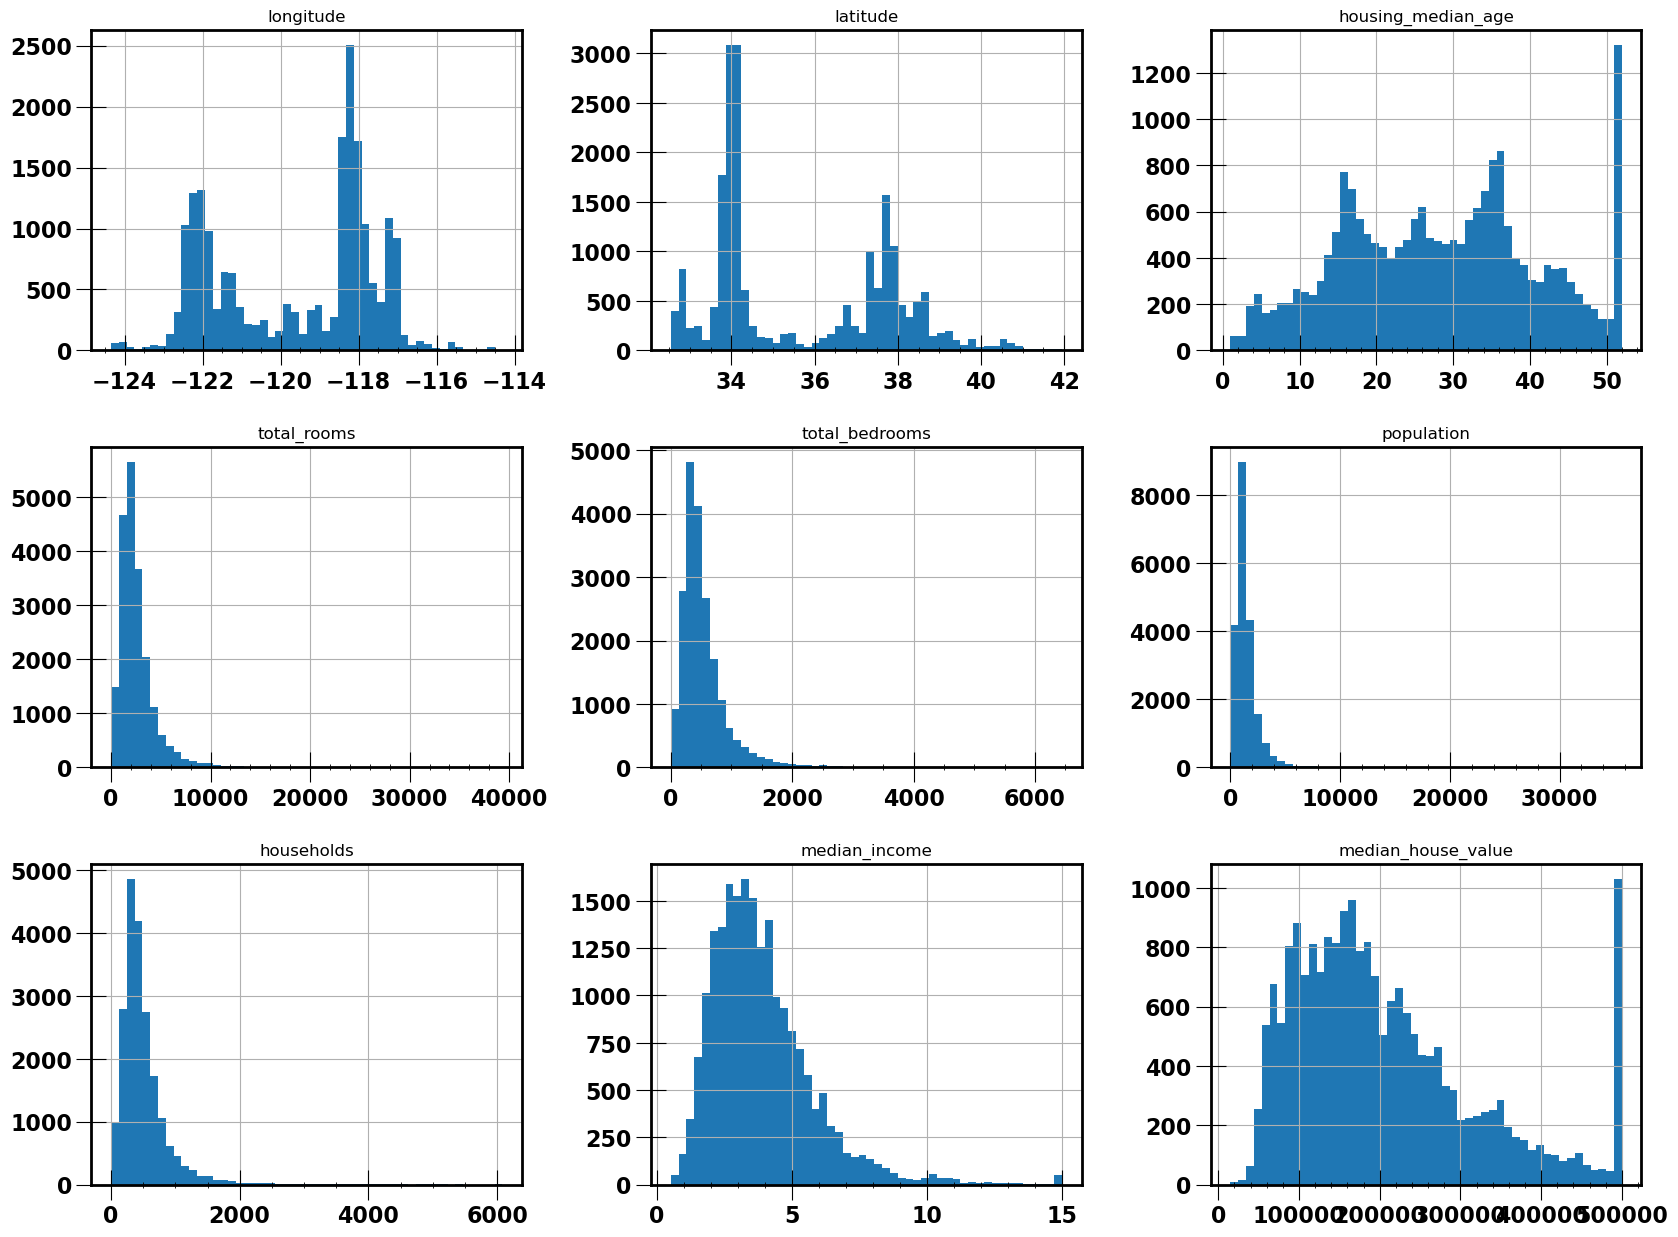

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

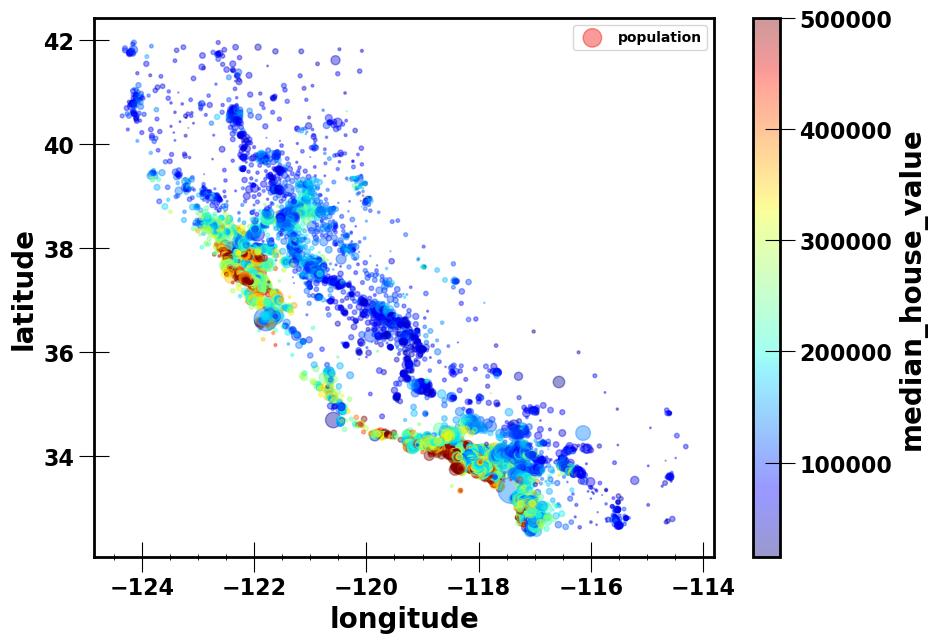

In [10]:
 
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()


**Check correlations**

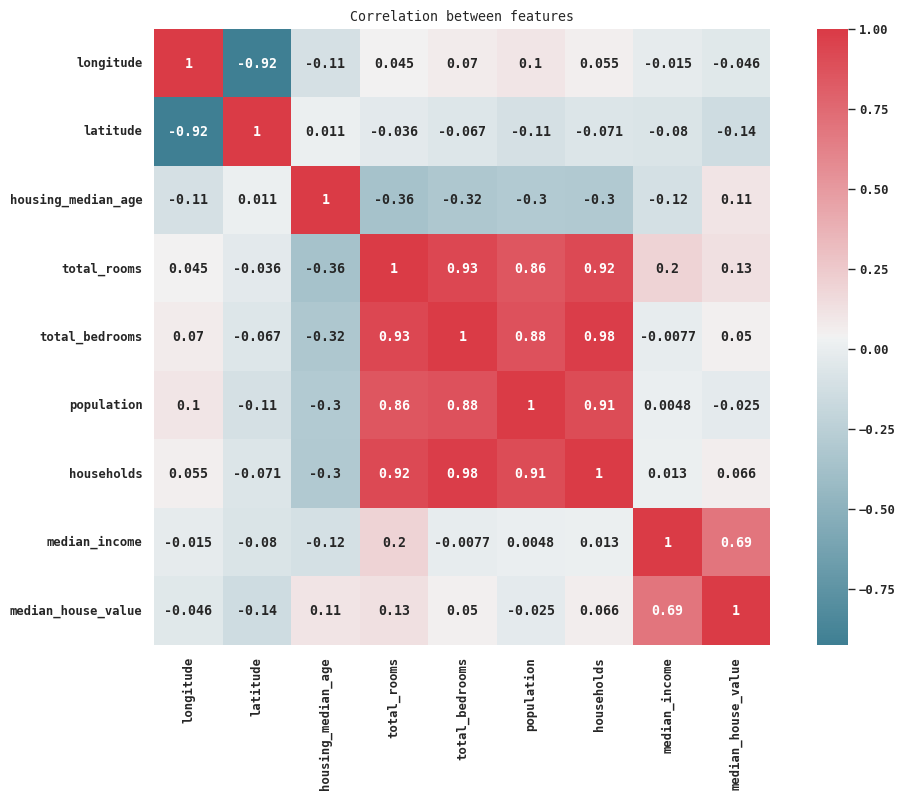

In [11]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
housing_corr=housing.drop(['ocean_proximity'],axis=1)
housing_corr_matrix = housing_corr.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
plt.title("Correlation between features")
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );


**conclusions** There is a strong correlation between the following features:
    
    households
    total_bedrooms
    total_rooms
    population

The number of bedrooms in a district is obviously correlated with the number of rooms in the district, the same is true for the number of families and the total population living in a district, finally number of rooms is correlated with the people.

We do not include the ocean_proximity as it is not numerical, later in the notebook we will transform this feature and include it in this plot.

**Add new features to check if the correlation with the median house value is better**

The total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. The total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [12]:
housing_corr["rooms_per_household"] = housing_corr["total_rooms"]/housing_corr["households"]
housing_corr["bedrooms_per_room"] = housing_corr["total_bedrooms"]/housing_corr["total_rooms"]
housing_corr["population_per_household"]=housing_corr["population"]/housing_corr["households"]

In [13]:
corr_matrix = housing_corr.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

**The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.**

# Prepare the Data for Machine Learning Algorithms

## Data Cleaning

There are three options:

    Remove the entire feature
    Set the values to some value (zero, the mean, the median, etc.)
    Remove only the row


It is only 207/20640, so we can remove them

In [14]:
housing=pd.read_csv('data/housing.csv')
housing=housing.dropna(subset='total_bedrooms')

#We also remove the row for with the median_house_value is 500 000
housing=housing[housing['median_house_value']!=max(housing['median_house_value'])]
housing.reset_index(drop=True, inplace=True)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
19470,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
19471,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
19472,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
19473,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [15]:
cat_ix = housing.select_dtypes(include=['object', 'bool']).columns
num_ix = housing.select_dtypes(include=['int64', 'float64']).columns

#X, y = housing.drop(['median_house_value'],axis=1), housing['median_house_value']
housing[cat_ix]


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
19470,INLAND
19471,INLAND
19472,INLAND
19473,INLAND


In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
housing_cat = encoder.fit_transform(housing[cat_ix])



encoded_feature_names = encoder.get_feature_names_out(cat_ix)
encoded_df = pd.DataFrame(housing_cat, columns=encoded_feature_names)
encoded_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
19470,0.0,1.0,0.0,0.0,0.0
19471,0.0,1.0,0.0,0.0,0.0
19472,0.0,1.0,0.0,0.0,0.0
19473,0.0,1.0,0.0,0.0,0.0


## Custom Transformers

Let's create a custom transformer to add extra attributes:

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing[num_ix].values)
housing_extra_attribs

array([[-1.22230000e+02,  3.78800000e+01,  4.10000000e+01, ...,
         4.52600000e+05,  6.98412698e+00,  2.55555556e+00],
       [-1.22220000e+02,  3.78600000e+01,  2.10000000e+01, ...,
         3.58500000e+05,  6.23813708e+00,  2.10984183e+00],
       [-1.22240000e+02,  3.78500000e+01,  5.20000000e+01, ...,
         3.52100000e+05,  8.28813559e+00,  2.80225989e+00],
       ...,
       [-1.21220000e+02,  3.94300000e+01,  1.70000000e+01, ...,
         9.23000000e+04,  5.20554273e+00,  2.32563510e+00],
       [-1.21320000e+02,  3.94300000e+01,  1.80000000e+01, ...,
         8.47000000e+04,  5.32951289e+00,  2.12320917e+00],
       [-1.21240000e+02,  3.93700000e+01,  1.60000000e+01, ...,
         8.94000000e+04,  5.25471698e+00,  2.61698113e+00]])

In [18]:
housing= pd.DataFrame(housing_extra_attribs,columns=list(housing[num_ix].columns)+["rooms_per_household", "population_per_household"],index=housing[num_ix].index,dtype='float64')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...
19470,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,2.560606
19471,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,3.122807
19472,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,2.325635
19473,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,2.123209


## Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling.

Min-max scaling (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1.

Standardization is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance

In [19]:
from sklearn.preprocessing import StandardScaler
num_ix = housing.select_dtypes(include=['int64', 'float64']).columns

scaled_ix=num_ix.drop(['median_house_value'])


scaler = StandardScaler()
scaled_data = scaler.fit(housing[scaled_ix])
scaled_data = scaler.transform(housing[scaled_ix])

X_scaled=pd.DataFrame(scaled_data,columns=list(housing[scaled_ix].columns),index=housing[scaled_ix].index)
X_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household
0,-1.328735,1.035547,1.008540,-0.796606,-0.972167,-0.977211,-0.978854,2.962270,0.704703,-0.050585
1,-1.323750,1.026246,-0.589536,2.049772,1.340793,0.839509,1.662088,2.947103,0.380416,-0.092295
2,-1.333719,1.021595,1.887481,-0.527942,-0.827755,-0.825162,-0.845763,2.281805,1.271565,-0.027498
3,-1.338704,1.021595,1.887481,-0.616276,-0.721222,-0.770984,-0.736159,1.253079,0.197497,-0.051297
4,-1.338704,1.021595,1.887481,-0.454712,-0.614688,-0.764867,-0.631774,0.107990,0.399420,-0.085592
...,...,...,...,...,...,...,...,...,...,...
19470,-0.760493,1.779666,-0.269921,-0.437319,-0.392152,-0.520191,-0.446490,-1.348718,-0.138052,-0.050112
19471,-0.820308,1.784316,-0.829247,-0.880364,-0.922452,-0.947500,-1.010170,-0.713691,0.326468,0.002500
19472,-0.825293,1.756412,-0.909151,-0.167740,-0.129369,-0.378628,-0.177699,-1.259693,-0.068460,-0.072101
19473,-0.875139,1.756412,-0.829247,-0.348070,-0.309292,-0.611071,-0.396907,-1.153144,-0.014570,-0.091044


In [20]:
housing_final=pd.concat([X_scaled,housing['median_house_value'], encoded_df], axis=1)
housing_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.328735,1.035547,1.008540,-0.796606,-0.972167,-0.977211,-0.978854,2.962270,0.704703,-0.050585,452600.0,0.0,0.0,0.0,1.0,0.0
1,-1.323750,1.026246,-0.589536,2.049772,1.340793,0.839509,1.662088,2.947103,0.380416,-0.092295,358500.0,0.0,0.0,0.0,1.0,0.0
2,-1.333719,1.021595,1.887481,-0.527942,-0.827755,-0.825162,-0.845763,2.281805,1.271565,-0.027498,352100.0,0.0,0.0,0.0,1.0,0.0
3,-1.338704,1.021595,1.887481,-0.616276,-0.721222,-0.770984,-0.736159,1.253079,0.197497,-0.051297,341300.0,0.0,0.0,0.0,1.0,0.0
4,-1.338704,1.021595,1.887481,-0.454712,-0.614688,-0.764867,-0.631774,0.107990,0.399420,-0.085592,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19470,-0.760493,1.779666,-0.269921,-0.437319,-0.392152,-0.520191,-0.446490,-1.348718,-0.138052,-0.050112,78100.0,0.0,1.0,0.0,0.0,0.0
19471,-0.820308,1.784316,-0.829247,-0.880364,-0.922452,-0.947500,-1.010170,-0.713691,0.326468,0.002500,77100.0,0.0,1.0,0.0,0.0,0.0
19472,-0.825293,1.756412,-0.909151,-0.167740,-0.129369,-0.378628,-0.177699,-1.259693,-0.068460,-0.072101,92300.0,0.0,1.0,0.0,0.0,0.0
19473,-0.875139,1.756412,-0.829247,-0.348070,-0.309292,-0.611071,-0.396907,-1.153144,-0.014570,-0.091044,84700.0,0.0,1.0,0.0,0.0,0.0


## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

**a single transformer able to handle all columns, applying the appropriate transformations to each column.**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# Function to remove rows with NaN values
def remove_nan_rows(X):
    X=X.dropna(subset='total_bedrooms')

    #We also remove the row for with the median_house_value is 500 000
    X=X[X['median_house_value']!=max(X['median_house_value'])]
    X.reset_index(drop=True, inplace=True)
    
    return X

#Class to create new 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X.values[:, rooms_ix] / X.values[:, households_ix]
        population_per_household = X.values[:, population_ix] / X.values[:, households_ix]
        return np.c_[X.values, rooms_per_household, population_per_household]

housing=pd.read_csv('data/housing.csv')

cat_ix = housing.select_dtypes(include=['object', 'bool']).columns
num_ix = housing.select_dtypes(include=['int64', 'float64']).columns

num_ix=num_ix.drop(['median_house_value'])

# Numerical pipeline
num_pipeline = Pipeline([
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

# Full pipeline with ColumnTransformer
full_pipeline = Pipeline([
    ('nan_removal', FunctionTransformer(remove_nan_rows, validate=False)),
    ('column_transform', ColumnTransformer([
        ('num', num_pipeline, num_ix),
        ('cat', OneHotEncoder(), cat_ix)
    ]))
])

# Transform the data
# Transform the data
housing_prepared_array = full_pipeline.fit_transform(housing)

# Convert the array back to a DataFrame
num_attrs = list(num_ix) + ['rooms_per_household', 'population_per_household']
cat_encoder = full_pipeline.named_steps['column_transform'].named_transformers_['cat']
cat_attrs = cat_encoder.get_feature_names_out(cat_ix)
all_attrs = num_attrs + list(cat_attrs)

housing_prepared = pd.DataFrame(housing_prepared_array, columns=all_attrs)

# Add the target variable back
housing_prepared['median_house_value'] = housing['median_house_value']

# Display the first few rows of the prepared DataFrame
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.328735,1.035547,1.008540,-0.796606,-0.972167,-0.977211,-0.978854,2.962270,0.704703,-0.050585,0.0,0.0,0.0,1.0,0.0,452600.0
1,-1.323750,1.026246,-0.589536,2.049772,1.340793,0.839509,1.662088,2.947103,0.380416,-0.092295,0.0,0.0,0.0,1.0,0.0,358500.0
2,-1.333719,1.021595,1.887481,-0.527942,-0.827755,-0.825162,-0.845763,2.281805,1.271565,-0.027498,0.0,0.0,0.0,1.0,0.0,352100.0
3,-1.338704,1.021595,1.887481,-0.616276,-0.721222,-0.770984,-0.736159,1.253079,0.197497,-0.051297,0.0,0.0,0.0,1.0,0.0,341300.0
4,-1.338704,1.021595,1.887481,-0.454712,-0.614688,-0.764867,-0.631774,0.107990,0.399420,-0.085592,0.0,0.0,0.0,1.0,0.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19470,-0.760493,1.779666,-0.269921,-0.437319,-0.392152,-0.520191,-0.446490,-1.348718,-0.138052,-0.050112,0.0,1.0,0.0,0.0,0.0,107400.0
19471,-0.820308,1.784316,-0.829247,-0.880364,-0.922452,-0.947500,-1.010170,-0.713691,0.326468,0.002500,0.0,1.0,0.0,0.0,0.0,155500.0
19472,-0.825293,1.756412,-0.909151,-0.167740,-0.129369,-0.378628,-0.177699,-1.259693,-0.068460,-0.072101,0.0,1.0,0.0,0.0,0.0,121200.0
19473,-0.875139,1.756412,-0.829247,-0.348070,-0.309292,-0.611071,-0.396907,-1.153144,-0.014570,-0.091044,0.0,1.0,0.0,0.0,0.0,118600.0


# Select and Train a Model

In [24]:
housing=pd.read_csv('data/housing.csv')

cat_ix = housing.select_dtypes(include=['object', 'bool']).columns
num_ix = housing.select_dtypes(include=['int64', 'float64']).columns

num_ix=num_ix.drop(['median_house_value'])

# Transform the data
housing_prepared_array = full_pipeline.fit_transform(housing)

# Convert the array back to a DataFrame
num_attrs = list(num_ix) + ['rooms_per_household', 'population_per_household']
cat_encoder = full_pipeline.named_steps['column_transform'].named_transformers_['cat']
cat_attrs = cat_encoder.get_feature_names_out(cat_ix)
all_attrs = num_attrs + list(cat_attrs)

housing_prepared = pd.DataFrame(housing_prepared_array, columns=all_attrs)

# Add the target variable back
housing_prepared['median_house_value'] = housing['median_house_value']

# Display the first few rows of the prepared DataFrame
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.328735,1.035547,1.008540,-0.796606,-0.972167,-0.977211,-0.978854,2.962270,0.704703,-0.050585,0.0,0.0,0.0,1.0,0.0,452600.0
1,-1.323750,1.026246,-0.589536,2.049772,1.340793,0.839509,1.662088,2.947103,0.380416,-0.092295,0.0,0.0,0.0,1.0,0.0,358500.0
2,-1.333719,1.021595,1.887481,-0.527942,-0.827755,-0.825162,-0.845763,2.281805,1.271565,-0.027498,0.0,0.0,0.0,1.0,0.0,352100.0
3,-1.338704,1.021595,1.887481,-0.616276,-0.721222,-0.770984,-0.736159,1.253079,0.197497,-0.051297,0.0,0.0,0.0,1.0,0.0,341300.0
4,-1.338704,1.021595,1.887481,-0.454712,-0.614688,-0.764867,-0.631774,0.107990,0.399420,-0.085592,0.0,0.0,0.0,1.0,0.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19470,-0.760493,1.779666,-0.269921,-0.437319,-0.392152,-0.520191,-0.446490,-1.348718,-0.138052,-0.050112,0.0,1.0,0.0,0.0,0.0,107400.0
19471,-0.820308,1.784316,-0.829247,-0.880364,-0.922452,-0.947500,-1.010170,-0.713691,0.326468,0.002500,0.0,1.0,0.0,0.0,0.0,155500.0
19472,-0.825293,1.756412,-0.909151,-0.167740,-0.129369,-0.378628,-0.177699,-1.259693,-0.068460,-0.072101,0.0,1.0,0.0,0.0,0.0,121200.0
19473,-0.875139,1.756412,-0.829247,-0.348070,-0.309292,-0.611071,-0.396907,-1.153144,-0.014570,-0.091044,0.0,1.0,0.0,0.0,0.0,118600.0


## Training and Evaluating on the Training Set

In [25]:
# TRAIN TEST SPLIT 
from sklearn.model_selection import train_test_split 
X,y = housing_prepared.drop(['median_house_value'],axis=1), housing_prepared['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_test_pred=lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_test_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


109713.67589917468

Okay, this is better than nothing but clearly not a great score: most districts’
median_housing_values range between USD120,000 and USD265,000, so a typical predic‐
tion error of USD62,000 is not very satisfying.

In [27]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_test_pred)
lin_mae

85762.182730958

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_test, y_test)

DecisionTreeRegressor(random_state=42)

In [29]:
housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**The model has badly overfit the data!!!**

## Better Evaluation Using Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score,KFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = KFold(n_splits=5)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

In [31]:
print("Decision tree :")

scores = evaluate_model(X,y,tree_reg)
scores=np.sqrt(-scores)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Decision tree :
Scores: [186068.59945413 144926.663455   175195.99479246 163093.65145731
 156193.19667007]
Mean: 165095.62116579502
Standard deviation: 14366.149556766453


**Notes** Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to per‐
form worse than the Linear Regression model!

In [32]:
print("Linear Regression :")

scores = evaluate_model(X,y,lin_reg)
scores=np.sqrt(-scores)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Linear Regression :
Scores: [114570.53938233 120504.6718102  128993.82102226  93623.11365601
 132441.63600222]
Mean: 118026.75637460379
Standard deviation: 13723.618621958803


In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
housing_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

73609.49608095946

In [35]:
print("Random Forest Regressor :")

scores = evaluate_model(X,y,forest_reg)
scores=np.sqrt(-scores)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Random Forest Regressor :
Scores: [145265.71083723 133998.27842386 144297.86544792 154782.35610403
 124830.45295219]
Mean: 140634.93275304767
Standard deviation: 10284.333051051926


In [36]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
housing_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

116617.37065464747

## Test different models

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
# define models to test
def get_models():
 models, names = list(), list()
 # CART
 models.append(DecisionTreeRegressor())
 names.append('DT')
 # SVM
 models.append(SVR(gamma='scale'))
 names.append('SVR')
 # RF
 models.append(RandomForestRegressor(n_estimators=100))
 names.append('RF')
 # GBM
 models.append(GradientBoostingRegressor(n_estimators=100))
 names.append('GBM') 
 # KNN
 models.append(KNeighborsRegressor())
 names.append('KNR')  
 return models, names

## Cleaning and model test all together

it's generally recommended to preprocess and transform your dataset within a pipeline that includes your model training and evaluation steps. This ensures that each model receives the data in a consistent and appropriate format, improving the reliability and comparability of your results across different models.

In [38]:

from sklearn.model_selection import train_test_split 
housing=pd.read_csv('data/housing.csv')

df_ml=housing.copy()

df_ml=df_ml.dropna(subset='total_bedrooms')

#We also remove the row for with the median_house_value is 500 000
df_ml=df_ml[df_ml['median_house_value']!=max(df_ml['median_house_value'])]
df_ml.reset_index(drop=True, inplace=True)

X, y = df_ml.drop(['median_house_value'],axis=1), df_ml['median_house_value']

cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# define models
models, names = get_models()

# I will also add a voting classifier
voting_models = [(names[i], models[i]) for i in range(len(models))]
voting_regressor = VotingRegressor(estimators=voting_models)

# Append VotingClassifier to models and names
models.append(voting_regressor)
names.append('Voting')
models, names = get_models()

# I will also add a voting classifier
voting_models = [(names[i], models[i]) for i in range(len(models[2:]))]
voting_Regressor = VotingRegressor(estimators=voting_models)

# Append VotingClassifier to models and names
models.append(voting_Regressor)
names.append('Voting')

results = list()
# evaluate each model
for i in range(len(models)):
 # define steps
 steps = [('c',OneHotEncoder(handle_unknown='ignore'),cat_ix), ('n',num_pipeline,num_ix)]
 # one hot encode categorical, normalize numerical
 ct = ColumnTransformer(steps)
 # wrap the model i a pipeline
 pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
 # evaluate the model and store results
 scores = evaluate_model(X_train, y_train, pipeline)
 scores=np.sqrt(-scores)
 results.append(scores)
 # summarize performance
 print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>DT 64632.719 (1372.246)
>SVR 99073.280 (2025.428)
>RF 45838.500 (667.971)
>GBM 48733.654 (886.361)
>KNR 55942.870 (693.898)
>Voting 56322.431 (1122.586)


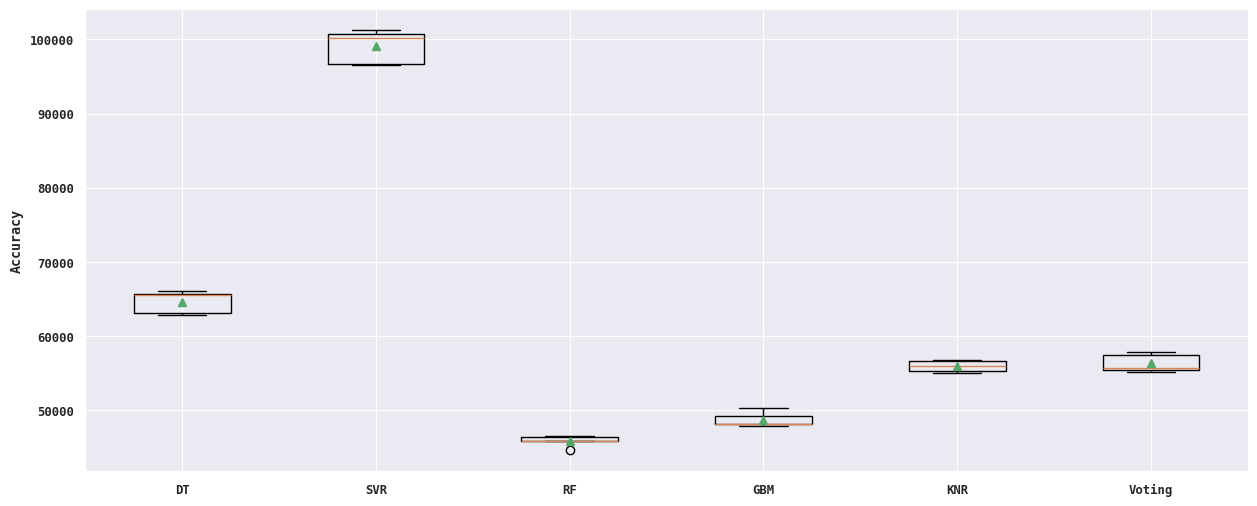

In [39]:
# plot the results
plt.figure(figsize=(15,6))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy')
plt.show()

# Fine-Tune Your Model: Random forest

## Grid Search

Manually adjusting hyperparameters until finding an optimal combination can be extremely tedious and time-consuming. Exploring numerous combinations might not be feasible due to time constraints. Instead, leveraging Scikit-Learn's GridSearchCV automates this process for you. Simply specify the hyperparameters you want to explore and the values to test. GridSearchCV will systematically evaluate all possible combinations using cross-validation

In [40]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [3, 10, 30,50,100],
    'model__max_features': [2, 4, 6, 8,10],
    'model__bootstrap': [True, False],
}

# define steps
steps = [('c',OneHotEncoder(handle_unknown='ignore'),cat_ix), ('n',num_pipeline,num_ix)]
# one hot encode categorical, normalize numerical
ct = ColumnTransformer(steps)
# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessing', ct), ('model', RandomForestRegressor())])
# Set up GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", np.sqrt(-grid_search.best_score_))

# Evaluate model performance on test set
y_pred = grid_search.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {test_rmse:.4f}")

Best parameters: {'model__bootstrap': False, 'model__max_features': 6, 'model__n_estimators': 100}
Best CV score: 44126.03404725938
Test RMSE: 42804.3238


In [41]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('c',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['ocean_proximity'], dtype='object')),
                                                 ('n',
                                                  Pipeline(steps=[('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(bootstrap=False, max_features=6))])

Let's look at the score of each hyperparameter combination tested during the grid search:

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

57905.21016613934 {'model__bootstrap': True, 'model__max_features': 2, 'model__n_estimators': 3}
50378.18896591636 {'model__bootstrap': True, 'model__max_features': 2, 'model__n_estimators': 10}
47810.69511766982 {'model__bootstrap': True, 'model__max_features': 2, 'model__n_estimators': 30}
47511.36861211156 {'model__bootstrap': True, 'model__max_features': 2, 'model__n_estimators': 50}
47069.488447472555 {'model__bootstrap': True, 'model__max_features': 2, 'model__n_estimators': 100}
54471.67210739368 {'model__bootstrap': True, 'model__max_features': 4, 'model__n_estimators': 3}
47942.409515517786 {'model__bootstrap': True, 'model__max_features': 4, 'model__n_estimators': 10}
46222.828336859915 {'model__bootstrap': True, 'model__max_features': 4, 'model__n_estimators': 30}
45107.94483232362 {'model__bootstrap': True, 'model__max_features': 4, 'model__n_estimators': 50}
45239.02336854932 {'model__bootstrap': True, 'model__max_features': 4, 'model__n_estimators': 100}
53987.06564598076

In [43]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bootstrap,param_model__max_features,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080341,0.003916,0.006221,0.000415,True,2,3,"{'model__bootstrap': True, 'model__max_feature...",-3.379635e+09,-3.730663e+09,...,-3.353013e+09,2.245692e+08,50,-8.763502e+08,-9.725470e+08,-8.671047e+08,-8.741127e+08,-8.788033e+08,-8.937836e+08,3.957452e+07
1,0.233156,0.001115,0.012263,0.000460,True,2,10,"{'model__bootstrap': True, 'model__max_feature...",-2.638963e+09,-2.643076e+09,...,-2.537962e+09,1.055155e+08,40,-4.672607e+08,-4.795065e+08,-4.718753e+08,-4.807080e+08,-4.659435e+08,-4.730588e+08,6.094739e+06
2,0.636023,0.018652,0.029775,0.002495,True,2,30,"{'model__bootstrap': True, 'model__max_feature...",-2.363228e+09,-2.333531e+09,...,-2.285863e+09,6.570457e+07,36,-3.539264e+08,-3.572842e+08,-3.529575e+08,-3.589917e+08,-3.591573e+08,-3.564634e+08,2.571017e+06
3,1.071353,0.008210,0.045062,0.000274,True,2,50,"{'model__bootstrap': True, 'model__max_feature...",-2.370078e+09,-2.297572e+09,...,-2.257330e+09,7.317457e+07,35,-3.334424e+08,-3.280012e+08,-3.288957e+08,-3.330197e+08,-3.318070e+08,-3.310332e+08,2.195957e+06
4,2.114662,0.024064,0.086031,0.003453,True,2,100,"{'model__bootstrap': True, 'model__max_feature...",-2.314481e+09,-2.265133e+09,...,-2.215537e+09,7.663521e+07,32,-3.083079e+08,-3.095879e+08,-3.151474e+08,-3.196495e+08,-3.182624e+08,-3.141910e+08,4.540617e+06
5,0.148784,0.020296,0.007791,0.000945,True,4,3,"{'model__bootstrap': True, 'model__max_feature...",-3.112068e+09,-2.938475e+09,...,-2.967163e+09,7.619682e+07,48,-8.026226e+08,-7.466421e+08,-7.569118e+08,-8.041667e+08,-7.777831e+08,-7.776252e+08,2.331669e+07
6,0.377350,0.012851,0.012565,0.000534,True,4,10,"{'model__bootstrap': True, 'model__max_feature...",-2.312734e+09,-2.316529e+09,...,-2.298475e+09,4.765673e+07,38,-4.261047e+08,-4.188531e+08,-4.359798e+08,-4.280081e+08,-4.198063e+08,-4.257504e+08,6.209137e+06
7,1.052717,0.046656,0.028319,0.000686,True,4,30,"{'model__bootstrap': True, 'model__max_feature...",-2.189879e+09,-2.227959e+09,...,-2.136550e+09,6.865811e+07,24,-3.219883e+08,-3.312367e+08,-3.344619e+08,-3.334054e+08,-3.325191e+08,-3.307223e+08,4.493551e+06
8,1.716588,0.023444,0.044810,0.000999,True,4,50,"{'model__bootstrap': True, 'model__max_feature...",-2.095446e+09,-2.114968e+09,...,-2.034727e+09,6.685314e+07,14,-3.003568e+08,-3.013473e+08,-2.988224e+08,-3.008590e+08,-3.102403e+08,-3.023252e+08,4.047189e+06
9,3.379753,0.011418,0.084451,0.000424,True,4,100,"{'model__bootstrap': True, 'model__max_feature...",-2.136185e+09,-2.083997e+09,...,-2.046569e+09,6.632494e+07,17,-2.847097e+08,-2.905452e+08,-2.888931e+08,-2.919581e+08,-2.889782e+08,-2.890169e+08,2.431256e+06


## Randomized Search

When exploring a large hyperparameter search space, GridSearchCV can become impractical due to its exhaustive nature, as seen in the previous example. In such cases, RandomizedSearchCV offers a more efficient alternative. This class operates similarly to GridSearchCV but instead of evaluating all possible combinations, it randomly samples a specified number of combinations for hyperparameters at each iteration.

RandomizedSearchCV offers two key advantages:

    It explores a broader range of hyperparameter values. For instance, running it for 1,000 iterations allows evaluation of 1,000 different values per hyperparameter, significantly more than the few values per hyperparameter typically tested in GridSearchCV.
    
    It provides greater flexibility in managing computational resources. You can control the computing budget by simply adjusting the number of iterations, tailoring the search to match the available resources.

This randomized approach strikes a balance between thorough exploration of hyperparameter space and efficient use of computational time, making it particularly advantageous for complex models or when searching across a wide range of hyperparameters.

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'model__n_estimators': randint(low=1, high=200),
        'model__max_features': randint(low=1, high=8),
    }


# define steps
steps = [('c',OneHotEncoder(handle_unknown='ignore'),cat_ix), ('n',num_pipeline,num_ix)]
# one hot encode categorical, normalize numerical
ct = ColumnTransformer(steps)
# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessing', ct), ('model', RandomForestRegressor())])
# Set up GridSearchCV with the pipeline and parameter grid
rdm_search = RandomizedSearchCV(pipeline, param_distributions=param_distribs,n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit GridSearchCV on the training data
rdm_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", rdm_search.best_params_)
print("Best CV score:", np.sqrt(-rdm_search.best_score_))


Best parameters: {'model__max_features': 7, 'model__n_estimators': 122}
Best CV score: 44584.2706725805


In [45]:
cvres = rdm_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

44591.68576500211 {'model__max_features': 7, 'model__n_estimators': 180}
46711.34242074071 {'model__max_features': 5, 'model__n_estimators': 15}
45945.86194329941 {'model__max_features': 3, 'model__n_estimators': 72}
45850.60640713699 {'model__max_features': 5, 'model__n_estimators': 21}
44584.2706725805 {'model__max_features': 7, 'model__n_estimators': 122}
45940.83553187478 {'model__max_features': 3, 'model__n_estimators': 75}
45869.221134960724 {'model__max_features': 3, 'model__n_estimators': 88}
44860.42863048953 {'model__max_features': 5, 'model__n_estimators': 100}
45630.27196085276 {'model__max_features': 3, 'model__n_estimators': 150}
58259.97093244326 {'model__max_features': 5, 'model__n_estimators': 2}


## Analyze the Best Models and Their Errors

In [46]:
feature_importances = rdm_search.best_estimator_.named_steps['model'].feature_importances_
feature_importances

array([2.01720240e-02, 1.66978847e-01, 2.37139184e-04, 3.27174395e-03,
       6.13988289e-03, 9.26623219e-02, 7.79351069e-02, 4.30710589e-02,
       2.06445121e-02, 1.98085151e-02, 2.09040516e-02, 1.92728313e-02,
       3.39469579e-01, 6.17959984e-02, 1.07636388e-01])

In [47]:
# Access the ColumnTransformer to get feature names after one-hot encoding
best_pipeline = rdm_search.best_estimator_
ct = best_pipeline.named_steps['preprocessing']
encoded_feature_names = []

# Get categorical feature names after one-hot encoding
if hasattr(ct, 'named_transformers_') and 'c' in ct.named_transformers_:
    ohe = ct.named_transformers_['c']
    if hasattr(ohe, 'get_feature_names_out'):
        encoded_feature_names.extend(ohe.get_feature_names_out())
encoded_feature_names

['ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [48]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold"]
feature_names = list(num_ix) + encoded_feature_names +extra_attribs 
feature_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'rooms_per_hhold',
 'pop_per_hhold']

In [49]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
12,ocean_proximity_NEAR OCEAN,0.339470
1,latitude,0.166979
14,pop_per_hhold,0.107636
5,population,0.092662
6,households,0.077935
13,rooms_per_hhold,0.061796
7,median_income,0.043071
10,ocean_proximity_ISLAND,0.020904
8,ocean_proximity_<1H OCEAN,0.020645
0,longitude,0.020172


## Evaluate Your System on the Test Set

In [50]:
final_model = rdm_search.best_estimator_

# Evaluate model performance on test set
y_pred = final_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 43486.7886


We can compute a 95% confidence interval for the test RMSE:

In [51]:
from scipy import stats

confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([41769.60936649, 45138.68955976])

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Let's try the full pipeline on a few instances:

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.